In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan dataset..csv to loan dataset..csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['loan dataset..csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.head(10)#no of rows which you want

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
df.describe() #it is giving info about numeric columns.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


the applicant income has a positive skew . we understand it by calculating the upper outlier.plot min median and mean on a graph.IQR = q3-q1.

upper outlier= q3+1.5Iqr.which will be 10,172.any values above the upper outlier will be considered outliers.loan amount has a lot of outliers.
by the mean of credit history(which isless tha 1) we understand that 84% people have a credit history.or 0.84 is the probability of having credit history=1.

In [ ]:
df.shape #gives the size of the dataset

(614, 13)

In [ ]:
df['Property_Area'].value_counts()# we can look at the frequency distribution for non numeric values(categorical) so that we get a frequency table.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

DISTRIBUTION ANALYSIS

<Axes: >

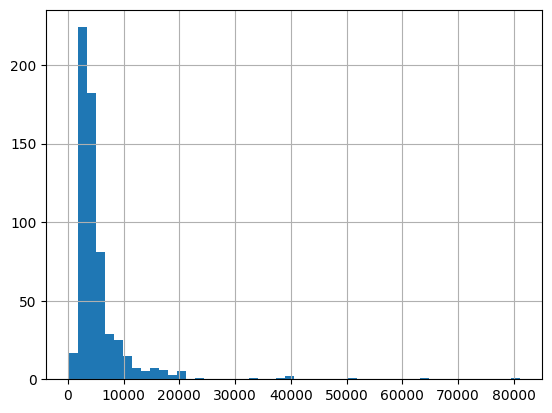

In [ ]:
#.hist FUNCTION IS USED TO CREATE HISTOGRAM
df['ApplicantIncome'].hist(bins=50)


we can see that is is a positive skew and there is very less data after 10000.

<Axes: >

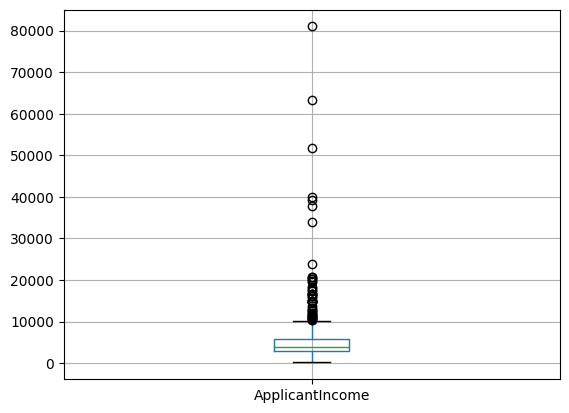

In [ ]:
df.boxplot(column='ApplicantIncome')

the circles are the outliers.The black line is the upper outlier limit and all the values above it are outliers .the green line is the median and the one below it is Q1  and above it is Q3. The line is minima which is at the end and it also is the lower outlier limit.

to run a machine learning algorithm the data should not have outliers.

check applicant income based on education.and then decide if you want to delete the data or not.

to check whether the applicant income increases if he or she is highly educated.


<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

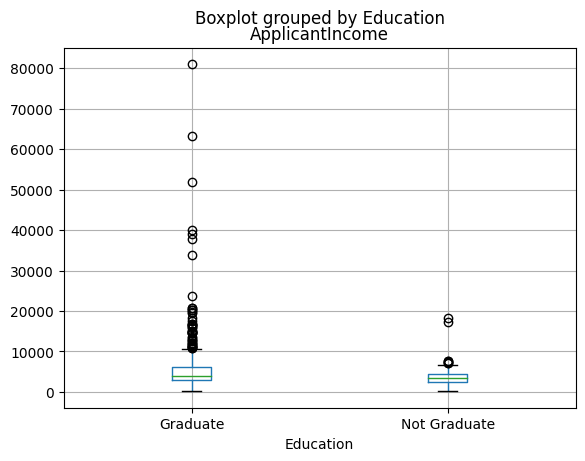

In [ ]:
df.boxplot(column='ApplicantIncome',by='Education')

people who study more have higher income therefore we should not delete these values.

You cannot create boxplots for two categorical columns together.
You can create a boxplot for one numeric and one categorical column.

<Axes: >

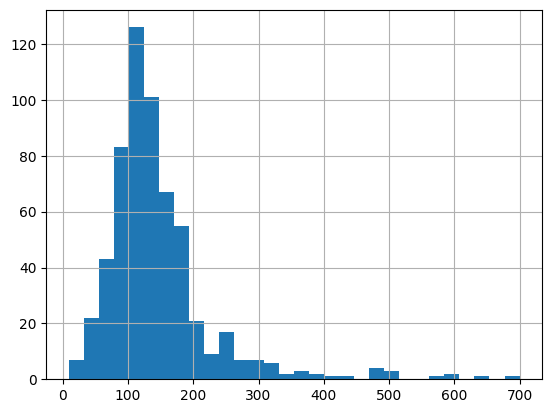

In [ ]:
df['LoanAmount'].hist(bins=30)

<Axes: >

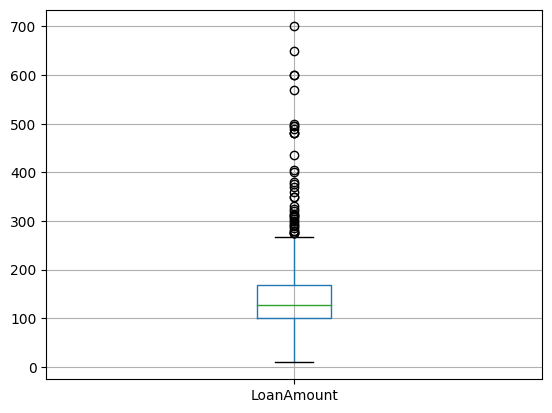

In [ ]:
df.boxplot(column='LoanAmount')

pivot table just transforms the data rows into columns and columns into rows


we will create a frequency table for credit history column.

In [ ]:
temp1=df['Credit_History'].value_counts(ascending=True)#ascen... means 0 will be first and then 1.
temp2= df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc =lambda x:x.map({'Y':1,'N':0}).mean())#lambda function defines a function in a single line
print('Frequency table for Credit History:')
print(temp1)

print("\nProbability of getting loan for each credit history class.")
print(temp2)

Frequency table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each credit history class.
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


0.07 is the probability of getting loan if your credit history was zero.
0.79 is the probability of getting loan if your credit history was 1.

now we will do DATA MUNGING.

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

if the data is categorical then only we use mode.
if the data is numeric we use mean or median
but mean is not a very robust measure,when there are outliers use median.

loan amount term will be treated as categorical data in float form

In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Now we will fill values in categorical data column.first we will calculate the frequency distribution which will give us the counts of each category.

In [ ]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

we will replace the na values of the self employed column with the mode of the data which is no.

In [ ]:
df['Self_Employed'].fillna('No',inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
df['Gender'].fillna('Male',inplace=True)

In [ ]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
df['Married'].fillna('Yes',inplace=True)

In [ ]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
df['Dependents'].fillna('0',inplace=True)# replaced dependents with a string because there is a value which is 3+ and it is not considerednumeric

In [ ]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
df['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [ ]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
df['Credit_History'].fillna(1.0,inplace=True)#replace with folat numeric but considered categorical

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

now we will treat the outliers in the data.

In [ ]:
# we will use log transformation
# we would take log values for every value in this distribution
#so every walue from 0 to 8k will be between 1 and 5
#np.log function is a log function coming from numpy library
df['LoanAmount_log']=np.log(df['LoanAmount'])

<Axes: >

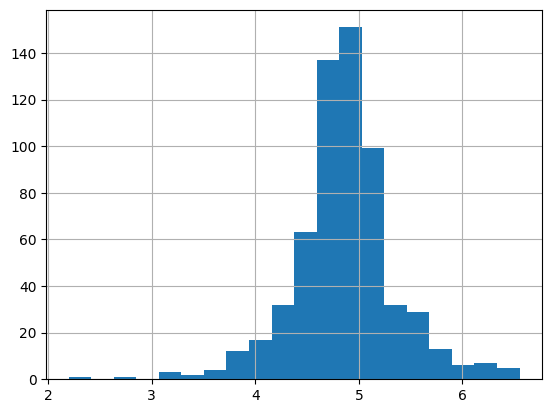

In [ ]:
df['LoanAmount_log'].hist(bins=20)

applicant and coapplicant income can be considered as a total income

In [ ]:
df['TotalIncome']=df['ApplicantIncome'] + df['CoapplicantIncome']

<Axes: >

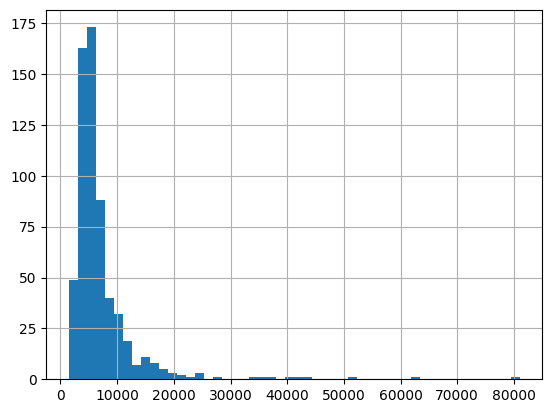

In [ ]:
df['TotalIncome'].hist(bins=50)

In [ ]:
df['TotalIncome_log'] = np.log(df['TotalIncome'])

<Axes: >

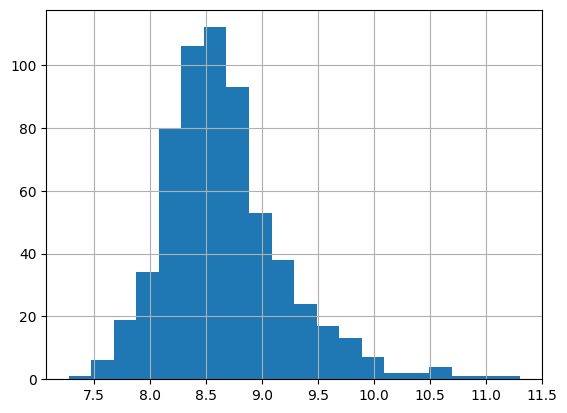

In [ ]:
df['TotalIncome_log'].hist(bins=20)

In [ ]:
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in var_mod:
    df[i] = le.ﬁt_transform(df[i].astype(str))

In [ ]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1,4.262680,2900.0,7.972466
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1,3.688879,4106.0,8.320205
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1,5.533389,8312.0,9.025456
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1,5.231109,7583.0,8.933664


In [ ]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold
#new versions of python support this, if old then use above comment
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier #export_graphviz
from sklearn import metrics #to compare the actual values and predicted values.in short we get y hat - y

K fold cross validation where k is number of folds .when k  fold = 5 the training process and the testing process happens 5 times.each time different data is used for training and testing for the same dataset.(permutations and combinations).we wil get the 5 accuracies . Then we will take the average of the 5 accuracies and we will get the cross validation score.We do this so that the algorithm does not memorize the outputs.

As we have seen that the code for most of the python algorithms is same therefore we are using a function

In [ ]:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])    # we are giving all the x values and y values
    #Make predictions on training set:
    predictions = model.predict(data[predictors])    #using all the x values for predicting y values
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome]) # we will give it the yhat and y values
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))# %s is a placeholder inside which the accuracy value would come.3 dec val will come
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(5,shuffle=True)  # shuffle=True will shuffle values for training and testing.
    accu = []
    for train, test in kf.split(data):
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])    #X_train
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]        #Y_train

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        #Record accu  from each cross-validation run
        accu.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))#. score function gives us accuracy we calculate
       # the accuracy using x test and y test we are getting the score for the testing data.

    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(accu)))
    # %s is placeholder for data from format, next % is used to conert it into percentage
    #.3% is no. of decimals








In [ ]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.942%


In [ ]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.942%


In [ ]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [ ]:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 89.414%
Cross-Validation Score : 69.218%


In [ ]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 79.323%


Random classifier also gives feature importance .estimators is number of trees actually.

In [ ]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

TotalIncome_log     0.259618
Credit_History      0.254681
LoanAmount_log      0.230455
Dependents          0.055174
Property_Area       0.052042
Loan_Amount_Term    0.048279
Married             0.027948
Education           0.026341
Gender              0.023623
Self_Employed       0.021838
dtype: float64


In [ ]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 83.225%
Cross-Validation Score : 80.620%
